# 4.1.2

In [ ]:
import numpy as np

In [19]:
# Считаем Гауссом
A = np.matrix([[29.7, 2, 0, 19.8, 2],
               [9.9, -21, 0, -9.9, 1],
               [-9.9, 11, 29, 6.6, 1],
               [9.9, 7.5, 2, -19.8, 0],
               [-49.5, -1, 23, 9.9, 84]])
b = np.array([26.2, -41.1, 97.4, 99.8, 27.1])

x_np = np.linalg.solve(A, b)


In [5]:
x_np

array([ 2.02020202,  4.        ,  3.        , -2.21212121,  1.        ])

In [20]:
# Приводим в вид х = Вх + с

n = 5
B = np.zeros((n, n), dtype=np.float)
c = np.empty((n,), dtype=np.float)

eps = 1e-10

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        try:
            B[i][j] = -A[i, j]/A[i, i]
        except ZeroDivisionError:
            B[i][j] = -A[i, j]/(A[i, i] + eps)        
c = np.asarray([b[i]/A[i, i] if A[i, i] != np.float(0) else b[i]/(A[i, i] + eps) for i in range(n)])

In [21]:
np.testing.assert_allclose(x_np, B@x_np + c)

In [24]:
# Проверяем действительно ли норма бесконечность меньше 1

norm_b = np.linalg.norm(B, ord=np.inf)
assert norm_b < 1

In [6]:
def seidel (A, B, x0, eps=1e-7, iterations=300):
    '''Solves system of linear eq with seidel method'''
    n = B.shape[0]
    x = np.zeros(shape=n)
    x_prev = x0.copy()
    for i in range(iterations):
        for ind in range(n):
            sum1 = np.sum(A[ind, j] * x[j] for j in range(ind))
            sum2 = np.sum(A[ind, j] * x_prev[j] for j in range(ind + 1, n))
            x[ind] = (B[ind] - sum1 - sum2 ) / A[ind, ind]
        if np.linalg.norm(x - x_prev) < eps:
            return (x, i + 1)
        x_prev = x.copy()
    return (x, iterations)

In [26]:
x0 = np.array([0, 0, 0, 0, 0])
x, it = seidel(A, b, x0, iterations=10)
a_err = np.linalg.norm(x - x_np, ord=np.inf)
print(f'Абсолютная погрешность при начальном векторе {x0} = {a_err}')

Абсолютная погрешность при начальном векторе [0 0 0 0 0] = 0.06853430876294997


/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  if __name__ == '__main__':


In [27]:
x0 = np.array([1, 2, 3, 4, 5])
x, it = seidel(A, b, x0, iterations=10)
a_err = np.linalg.norm(x - x_np, ord=np.inf)
print(f'Абсолютная погрешность при начальном векторе {x0} = {a_err}')

Абсолютная погрешность при начальном векторе [1 2 3 4 5] = 0.2279018623608735


/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  if __name__ == '__main__':


# 4.2

In [33]:
x0 = np.array([0, 0, 0, 0, 0])
x, it = seidel(A, b, x0, eps=1e-6)
a_err = np.linalg.norm(x - x_np, ord=np.inf)
print(f'Абсолютная погрешность при начальном векторе {x0} = {a_err}\nИтераций {it}')

x0 = np.array([1, 2, 3, 4, 5])
x, it = seidel(A, b, x0, eps=1e-6)
a_err = np.linalg.norm(x - x_np, ord=np.inf)
print(f'Абсолютная погрешность при начальном векторе {x0} = {a_err}\nИтераций {it}')

Абсолютная погрешность при начальном векторе [0 0 0 0 0] = 2.0652370746887527e-07
Итераций 48
Абсолютная погрешность при начальном векторе [1 2 3 4 5] = 1.8015999891929368e-07
Итераций 52


/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  if __name__ == '__main__':


# 4.4.2

In [128]:
t = np.arange(-1.0, 1.2, 0.2)
t = t.round(decimals=4)
B = dict.fromkeys(t)
B_norms = dict.fromkeys(t)
for key in B.keys():
    B[key] = np.array([[0.2, 0.3, -0.1], [np.cos(6*np.pi*key), -0.25, 0.3], [0.2, np.sin(10*np.pi*key), 0.3]])
    B_norms[key] = np.linalg.norm(B[key], ord=np.inf)

c = np.array([1, 2, 1])



In [103]:
B_norms

{-1.0: 1.55,
 -0.8: 1.359016994374947,
 -0.6: 0.859016994374947,
 -0.4: 0.8590169943749477,
 -0.2: 1.3590169943749475,
 -0.0: 1.55,
 0.2: 1.3590169943749475,
 0.4: 0.8590169943749477,
 0.6: 0.859016994374947,
 0.8: 1.359016994374947,
 1.0: 1.55}

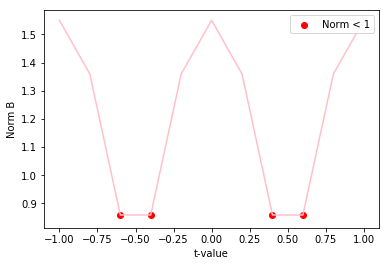

In [133]:
from matplotlib import pyplot as plt

plt.xlabel("t-value")
plt.ylabel("Norm B")

#plt.scatter(t, B_norms.values())
plt.plot(t, B_norms.values(), 'pink')

norm_ok = {k: v for k, v in B_norms.items() if v < 1}
plt.scatter(norm_ok.keys(), norm_ok.values(), color='red', label='Norm < 1')
plt.legend(loc=1)

In [135]:
import collections
norm_ok = collections.OrderedDict(sorted(norm_ok.items()))
x_maxt = next(iter(norm_ok))

x_ok, it = seidel(B[x_maxt], c, np.zeros(c.size), eps=1e-5)
print(f'Ответ при t = {x_maxt}: {x_ok}\nИтераций : {it}')

Ответ при t = -0.6: [ 8.88258661e+125  1.36694518e+126 -5.92172441e+125]
Итераций : 300


/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
/Users/alinacodzy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  if __name__ == '__main__':


# 4.7.1

In [146]:
n = 20
m = 1

q = 0.993 + (-1) **m * m * 10 ** (-4)
tau = np.sum([q ** (2 * i) for i in range(1, n + 1)])
t = n + m

b = np.array([t * q ** i for i in range(1, n+1)])

A = np.ones((n, n))
for i in range(n):
    for j in range(n):
        if (i == j):
            A[i][j] = tau+2*q**(i)*t+t**2
        else:
            A[i][j] = tau + (q**i + q**j)*t
x0 = np.linalg.solve(A, b)

In [147]:
A.shape, b.shape

((20, 20), (20,))

In [151]:
# Приводим в вид х = Вх + с

B = np.zeros((n, n), dtype=np.float)
c = np.empty(n, dtype=np.float)

eps = 1e-6

for i in range(n):
    for j in range(n):
        if i == j:
            continue
        try:
            B[i][j] = -A[i, j]/A[i, i]
        except ZeroDivisionError:
            B[i][j] = -A[i, j]/(A[i, i] + eps) 
            
c = np.asarray([b[i]/A[i, i] if A[i, i] != np.float(0) else b[i]/(A[i, i] + eps) for i in range(n)])

In [154]:
np.testing.assert_allclose(x0, B@x0 + c)

In [177]:
def rel(B, c, x0, w, eps, max_it):
    x = x0
    for i in range(max_it):
        z = x
        x = np.dot(B,z)+c
        x = x * w + z *(1 - w)
        if (np.linalg.norm(x - z, np.inf) < eps):
            return x, i+1   
    return x, i + 1

In [186]:
ws = np.linspace(0.1, 2, 20)
ls = []
for w in ws:
    x, nm = rel(B, c, x0 + 1, w, 1e-6, 200)
    ls.append(nm)

index = ls.index(min(ls))
w_opt = ws[index]
print("Оптимальное значение w: ", w_opt)
print("Решение x: ", rel(B, c, x0 + 1, w_opt, 1e-6, 200)[0])

Оптимальное значение w:  0.4
Решение x:  [0.01468274 0.01443103 0.01418111 0.01393296 0.01368656 0.01344192
 0.01319901 0.01295782 0.01271834 0.01248056 0.01224447 0.01201005
 0.0117773  0.01154619 0.01131672 0.01108888 0.01086266 0.01063804
 0.01041502 0.01019357]
